In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sportsreference.ncaab.roster import Roster 
from sportsreference.ncaab.player import AbstractPlayer

In [2]:
years = [str(i) for i in range(1953, 2020)]
duke_df = pd.DataFrame(columns=['Player', 'MinutesPlayed', 'PersonalFouls'])

In [3]:
for y in years:
    duke = Roster('DUKE', year=y, slim=False)
    for x in duke.players:
        duke_df = duke_df.append({'Player': x.name, 'MinutesPlayed': x.minutes_played, 'PersonalFouls': x.personal_fouls}, ignore_index=True)

In [5]:
duke_df.head()

,Player,MinutesPlayed,PersonalFouls
0,Bernie Janicki,None,249
1,Bill Reigel,None,93
2,Rudy D'Emilio,None,212
3,Rudy Lacy,None,159
4,Marv Decker,None,83


In [10]:
duke_df.shape   #(891,3)

(891, 3)

In [17]:
duke_noDupes = duke_df.drop_duplicates()  #drop duplicates for players on multiple rosters
duke_noDupes.shape   #(336,3)

(336, 3)

In [18]:
duke_noDupes.fillna(value=np.nan, inplace=True)

,Player,MinutesPlayed,PersonalFouls
0,Bernie Janicki,NaN,249.0
1,Bill Reigel,NaN,93.0
2,Rudy D'Emilio,NaN,212.0
3,Rudy Lacy,NaN,159.0
4,Marv Decker,NaN,83.0


In [21]:
duke_noNA = duke_noDupes.dropna()  #drop players with missing data
duke_noNA.shape    #(181,3)

(181, 3)

In [23]:
duke_noNA['FoulsPerMin'] = duke_noNA['PersonalFouls']/duke_noNA['MinutesPlayed']   #calc FPM feature

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
duke_noNA = duke_noNA.sort_values('FoulsPerMin', ascending=False)
duke_noNA.head()

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin
633,Matt Christensen,133.0,89.0,0.669173
470,Dave Colonna,2.0,1.0,0.500000
582,Jay Heaps,15.0,7.0,0.466667
634,Casey Sanders,832.0,218.0,0.262019
389,Mac Dyke,4.0,1.0,0.250000


In [34]:
duke_noNA['FPMrank'] = duke_noNA['FoulsPerMin'].rank(ascending=False)  #create ranks for each player by FPM

In [37]:
duke_noNA.describe()

,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank
count,181.000000,181.000000,181.000000,181.000000
mean,1605.618785,148.055249,0.108890,91.000000
std,1396.366986,120.057797,0.075778,52.392032
min,2.000000,0.000000,0.000000,1.000000
25%,292.000000,46.000000,0.071366,46.000000
50%,1210.000000,125.000000,0.095154,91.000000
75%,2705.000000,247.000000,0.130159,136.000000
max,4887.000000,432.000000,0.669173,177.500000


In [48]:
duke_noNA['FoulsPerMin'].describe(percentiles=[0.99, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.75, 0.5])   #see detailed percentiles

count    181.000000
mean       0.108890
std        0.075778
min        0.000000
50%        0.095154
75%        0.130159
90%        0.170580
91%        0.173741
92%        0.180013
93%        0.185709
94%        0.194119
95%        0.201342
99%        0.473333
max        0.669173
Name: FoulsPerMin, dtype: float64

In [39]:
duke_noNA.head(20)

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank
633,Matt Christensen,133.0,89.0,0.669173,1.0
470,Dave Colonna,2.0,1.0,0.500000,2.0
582,Jay Heaps,15.0,7.0,0.466667,3.0
634,Casey Sanders,832.0,218.0,0.262019,4.0
389,Mac Dyke,4.0,1.0,0.250000,5.5
580,Baker Perry,4.0,1.0,0.250000,5.5
648,Reggie Love,274.0,68.0,0.248175,7.0
401,Jay Bryan,244.0,57.0,0.233607,8.0
350,Jim Suddath,629.0,132.0,0.209857,9.0
330,Mike Gminski,1192.0,240.0,0.201342,10.0


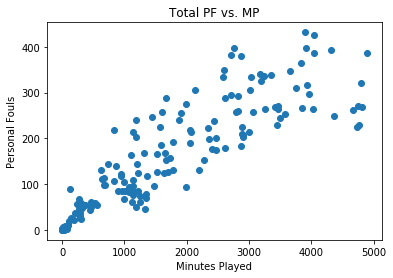

In [40]:
%matplotlib inline
plt.scatter(x='MinutesPlayed',y='PersonalFouls',data=duke_noNA)
plt.xlabel('Minutes Played')
plt.ylabel('Personal Fouls')
plt.title('Total PF vs. MP')
plt.show()

In [1]:
duke_noNA['Foulrank'] = duke_noNA['PersonalFouls'].rank(ascending=False)   #rank personal fouls

NameError: name 'duke_noNA' is not defined

In [45]:
duke_noNA['Minrank'] = duke_noNA['MinutesPlayed'].rank(ascending=False)   #rank minutes played
duke_noNA.head(20)

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
672,Shelden Williams,3903.0,432.0,0.110684,60.0,1.0,16.0
486,Christian Laettner,4048.0,425.0,0.104990,72.0,2.0,10.0
657,Dahntay Jones,3907.0,398.0,0.101868,80.0,3.0,15.0
730,Lance Thomas,2758.0,397.0,0.143945,34.0,4.0,45.0
448,Danny Ferry,4307.0,394.0,0.091479,99.0,5.0,9.0
739,Kyle Singler,4887.0,387.0,0.079190,120.0,6.5,1.0
405,Mark Alarie,4042.0,387.0,0.095745,89.0,6.5,11.0
345,Kenny Dennard,2702.0,383.0,0.141747,38.0,8.0,47.0
408,Jay Bilas,2864.0,379.0,0.132332,45.0,9.0,41.0
659,Daniel Ewing,3827.0,365.0,0.095375,90.0,10.0,18.0


In [46]:
duke_noNA = duke_noNA.sort_values('PersonalFouls', ascending=False)   #top 5 personal fouls list
duke_noNA.head()

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
672,Shelden Williams,3903.0,432.0,0.110684,60.0,1.0,16.0
486,Christian Laettner,4048.0,425.0,0.104990,72.0,2.0,10.0
657,Dahntay Jones,3907.0,398.0,0.101868,80.0,3.0,15.0
730,Lance Thomas,2758.0,397.0,0.143945,34.0,4.0,45.0
448,Danny Ferry,4307.0,394.0,0.091479,99.0,5.0,9.0


In [47]:
duke_noNA.loc[duke_noNA['Player'] == 'Javin DeLaurier']   #pull Javin's record

,Player,MinutesPlayed,PersonalFouls,FoulsPerMin,FPMrank,Foulrank,Minrank
859,Javin DeLaurier,1448.0,247.0,0.17058,19.0,46.0,82.0
